<ipython-input-13-5eaf421cb579>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
<ipython-input-13-5eaf421cb579>:52: UserWarning: Glyph 127863 (\N{WINE GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127863 (\N{WINE GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


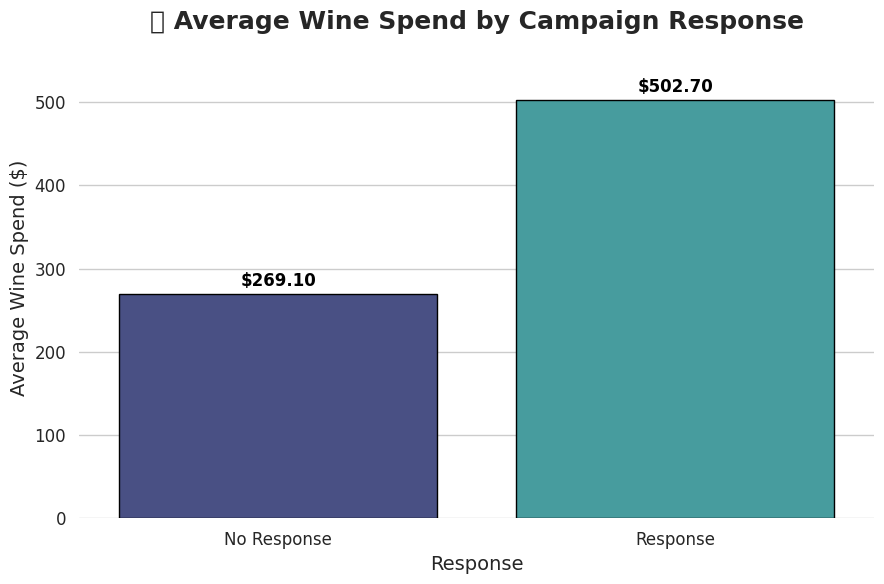

<Figure size 640x480 with 0 Axes>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV from GitHub raw URL
url = 'https://raw.githubusercontent.com/Data-Matt0/marketing-campaign-dashboard/refs/heads/main/data/queries/q3_wine_spending_vs_response.csv'
df = pd.read_csv(url)

# Convert 'response' to string for clarity in the plot
df['response'] = df['response'].astype(str)

sns.set(style='whitegrid')

plt.figure(figsize=(9, 6))

# Use a refined color palette
palette = sns.color_palette("mako", n_colors=len(df['response'].unique()))

barplot = sns.barplot(
    x='response',
    y='avg_wine_spend',
    data=df,
    palette=palette,
    edgecolor='black'
)

# Add data labels on top of bars
for index, row in df.iterrows():
    barplot.text(
        index,
        row.avg_wine_spend + (df['avg_wine_spend'].max() * 0.02),  # slight offset above bar
        f"${row.avg_wine_spend:,.2f}",
        color='black',
        ha='center',
        fontsize=12,
        weight='bold'
    )

# Titles and axis labels
plt.title("🍷 Average Wine Spend by Campaign Response", fontsize=18, weight='bold')
plt.xlabel("Response", fontsize=14)
plt.ylabel("Average Wine Spend ($)", fontsize=14)

# Clean up axes ticks and limits
plt.ylim(0, df['avg_wine_spend'].max() * 1.15)
plt.xticks(ticks=[0,1], labels=['No Response', 'Response'], fontsize=12)
plt.yticks(fontsize=12)

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# Save the figure
plt.savefig('q3_wine_spending_vs_response.png', dpi=300, bbox_inches='tight')
